In [1]:
import numpy as np
from scipy import signal 
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()
from matplotlib import mlab
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
fs = 10e3
N = 1e5
NFFT = 1024
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

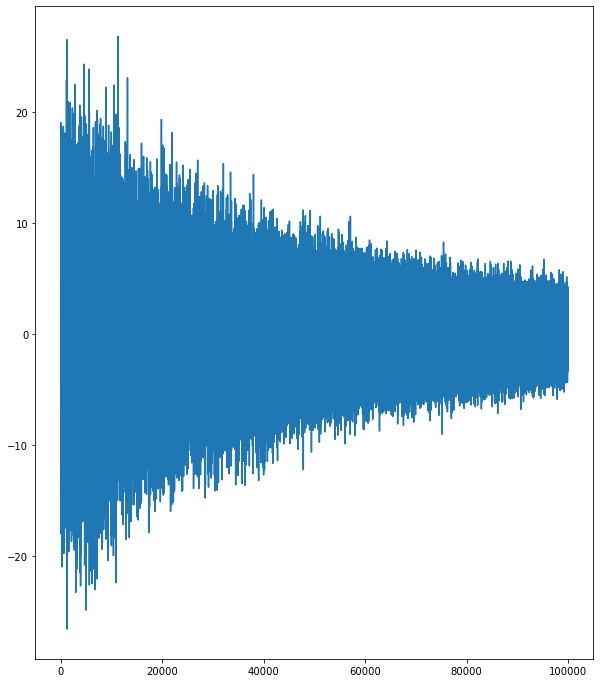

In [3]:
plt.figure(figsize=(10,12))
plt.plot(x)
plt.show()

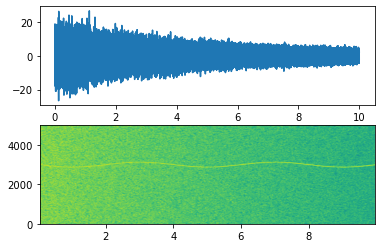

In [4]:

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(time, x)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT,Fs=fs, noverlap=900)
plt.show()


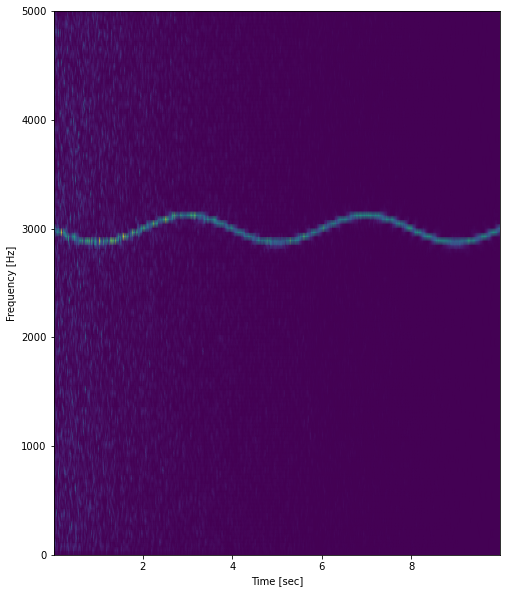

In [5]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.figure(figsize=(8,10))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [6]:
f, t, Sxx = signal.spectrogram(x,window=('tukey', 0.05),return_onesided=False)

<ipython-input-7-b5a82e0b30dd>:1: UserWarning: shading value 'gouroud' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0),shading='gouroud')


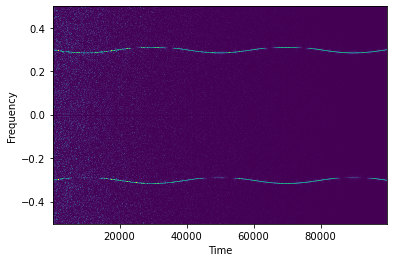

In [7]:
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0),shading='gouroud')
plt.ylabel('Frequency')
plt.xlabel('Time')
#plt.figure(figsize=[12,10])
plt.show()

In [8]:
plt.rcParams['figure.figsize'] = [10, 12]

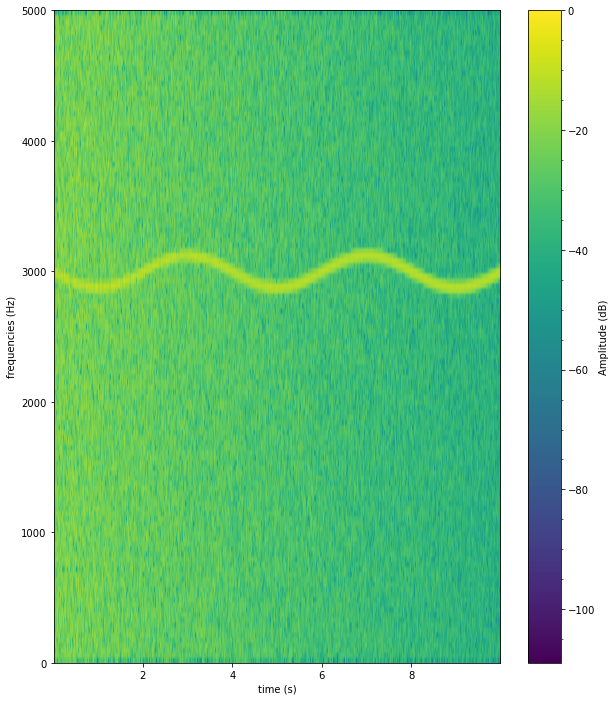

In [9]:
def specgram2d(y, srate=44100, ax=None, title=None):
  if not ax:
    ax = plt.axes()
  ax.set_title(title, loc='center', wrap=True)
  spec, freqs, t, im = ax.specgram(y, Fs=fs, scale='dB', vmax=0)
  ax.set_xlabel('time (s)')
  ax.set_ylabel('frequencies (Hz)')
  cbar = plt.colorbar(im, ax=ax)
  cbar.set_label('Amplitude (dB)')
  cbar.minorticks_on()
  return spec, freqs, t, im

fig1, ax1 = plt.subplots()
specgram2d(x, srate=fs, ax=ax1)
plt.show()

NameError: name 'x' is not defined

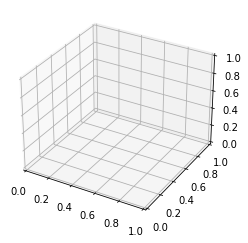

In [2]:
def specgram3d(y, srate=44100, ax=None, title=None):
  if not ax:
    ax = plt.axes(projection='3d')
  ax.set_title(title, loc='center', wrap=True)
  spec, freqs, t = mlab.specgram(y, Fs=srate)
  X, Y, Z = t[None, :], freqs[:, None],  20.0 * np.log10(spec)
  ax.plot_surface(X, Y, Z, cmap='viridis')
  ax.set_xlabel('time (s)')
  ax.set_ylabel('frequencies (Hz)')
  ax.set_zlabel('amplitude (dB)')
  ax.set_zlim(-140, 0)
  return X, Y, Z
fig2, ax2 = plt.subplots(subplot_kw={'projection': '3d'})
specgram3d(x, srate=fs, ax=ax2)
  
plt.show()

In [11]:
from scipy.io import wavfile
wavfile.write('sig.wav', int(fs), x)

In [12]:
samplerate, data = wavfile.read('sig.wav')
print(f"number of channels = {data.shape[0]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")

number of channels = 100000
length = 10.0s


In [13]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io

In [14]:
data_dir = pjoin(dirname(scipy.io.__file__), 'tests', 'data')
wav_fname = pjoin(data_dir, 'test-44100Hz-2ch-32bit-float-be.wav')

In [15]:
samplerate, data = wavfile.read(wav_fname)
print(f"number of channels = {data.shape[1]}")

length = data.shape[0] / samplerate
print(f"length = {length}s")


number of channels = 2
length = 0.01s


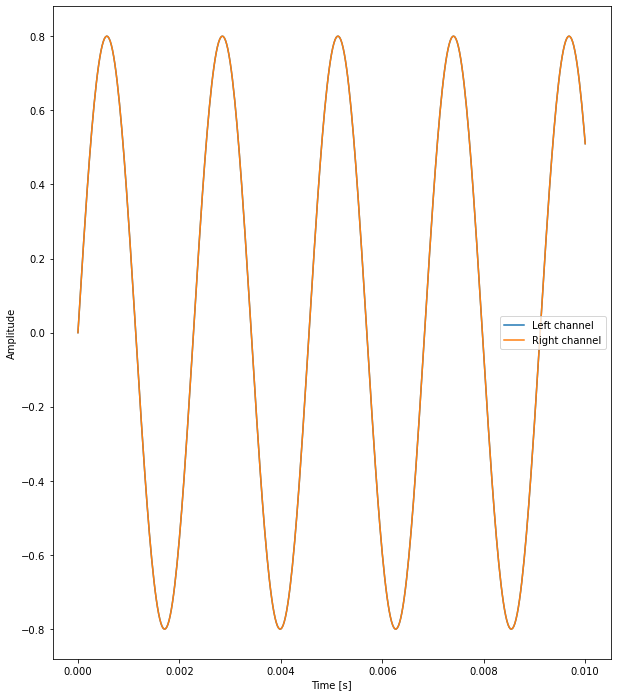

In [16]:
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()